In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import r2_score

### Nearest neighbor comparison

In [2]:
path = "/Users/hek/Research/Cheminformatics/Project_3_ML for Raman data/ML results/"

In [3]:
df_MACCS = pd.read_csv(path+"Drugs MACCS Tanimoto nearest neighbor - Unique compounds.csv",index_col="Unnamed: 0")
df_MCS = pd.read_csv(path+"Drugs MCS Tanimoto nearest neighbor - Unique compounds.csv",index_col="Unnamed: 0")
df_pearson = pd.read_csv(path+"Drug DFT IR spectra Pearson nearest neighbor - low variance Unique compounds.csv")
df_spearman = pd.read_csv(path+"Drug DFT IR spectra Spearman nearest neighbor - low variance Unique compounds.csv")
df_Morgan = pd.read_csv(path+"Drugs Morgan Tanimoto nearest neighbor - Unique compounds.csv",index_col="Unnamed: 0")
df_E3FP = pd.read_csv(path+"Drugs E3FP Tanimoto nearest neighbor - Unique compounds.csv",index_col="Unnamed: 0")
df_total_pearson = pd.read_csv(path+"Drug DFT total IR spectra Pearson nearest neighbor - low variance Unique compounds.csv")
df_total_spearman = pd.read_csv(path+"Drug DFT total IR spectra Spearman nearest neighbor - low variance Unique compounds.csv")

In [4]:
def correspodence_check(df1,df2):
    # Common nearest neighbor
    s = df1['Pair'] == df2['Pair']
    print("Number of common neighbor:", df1[s.astype(bool)].MaxValue.shape[0])
    # Different nearest neighbor
    ns = df1['Pair'] != df2['Pair']
    print("Number of different neighbor:",df1[ns.astype(bool)].MaxValue.shape[0])
    print("R square:", r2_score(df1['MaxValue'],df2['MaxValue']))
    
    return df1[s.astype(bool)].MaxValue, df2[s.astype(bool)].MaxValue,df1[ns.astype(bool)].MaxValue, df2[ns.astype(bool)].MaxValue

In [5]:
x1, y1, x2, y2 = correspodence_check(df_Morgan,df_E3FP)

Number of common neighbor: 69
Number of different neighbor: 58
R square: -3.7617307454526214


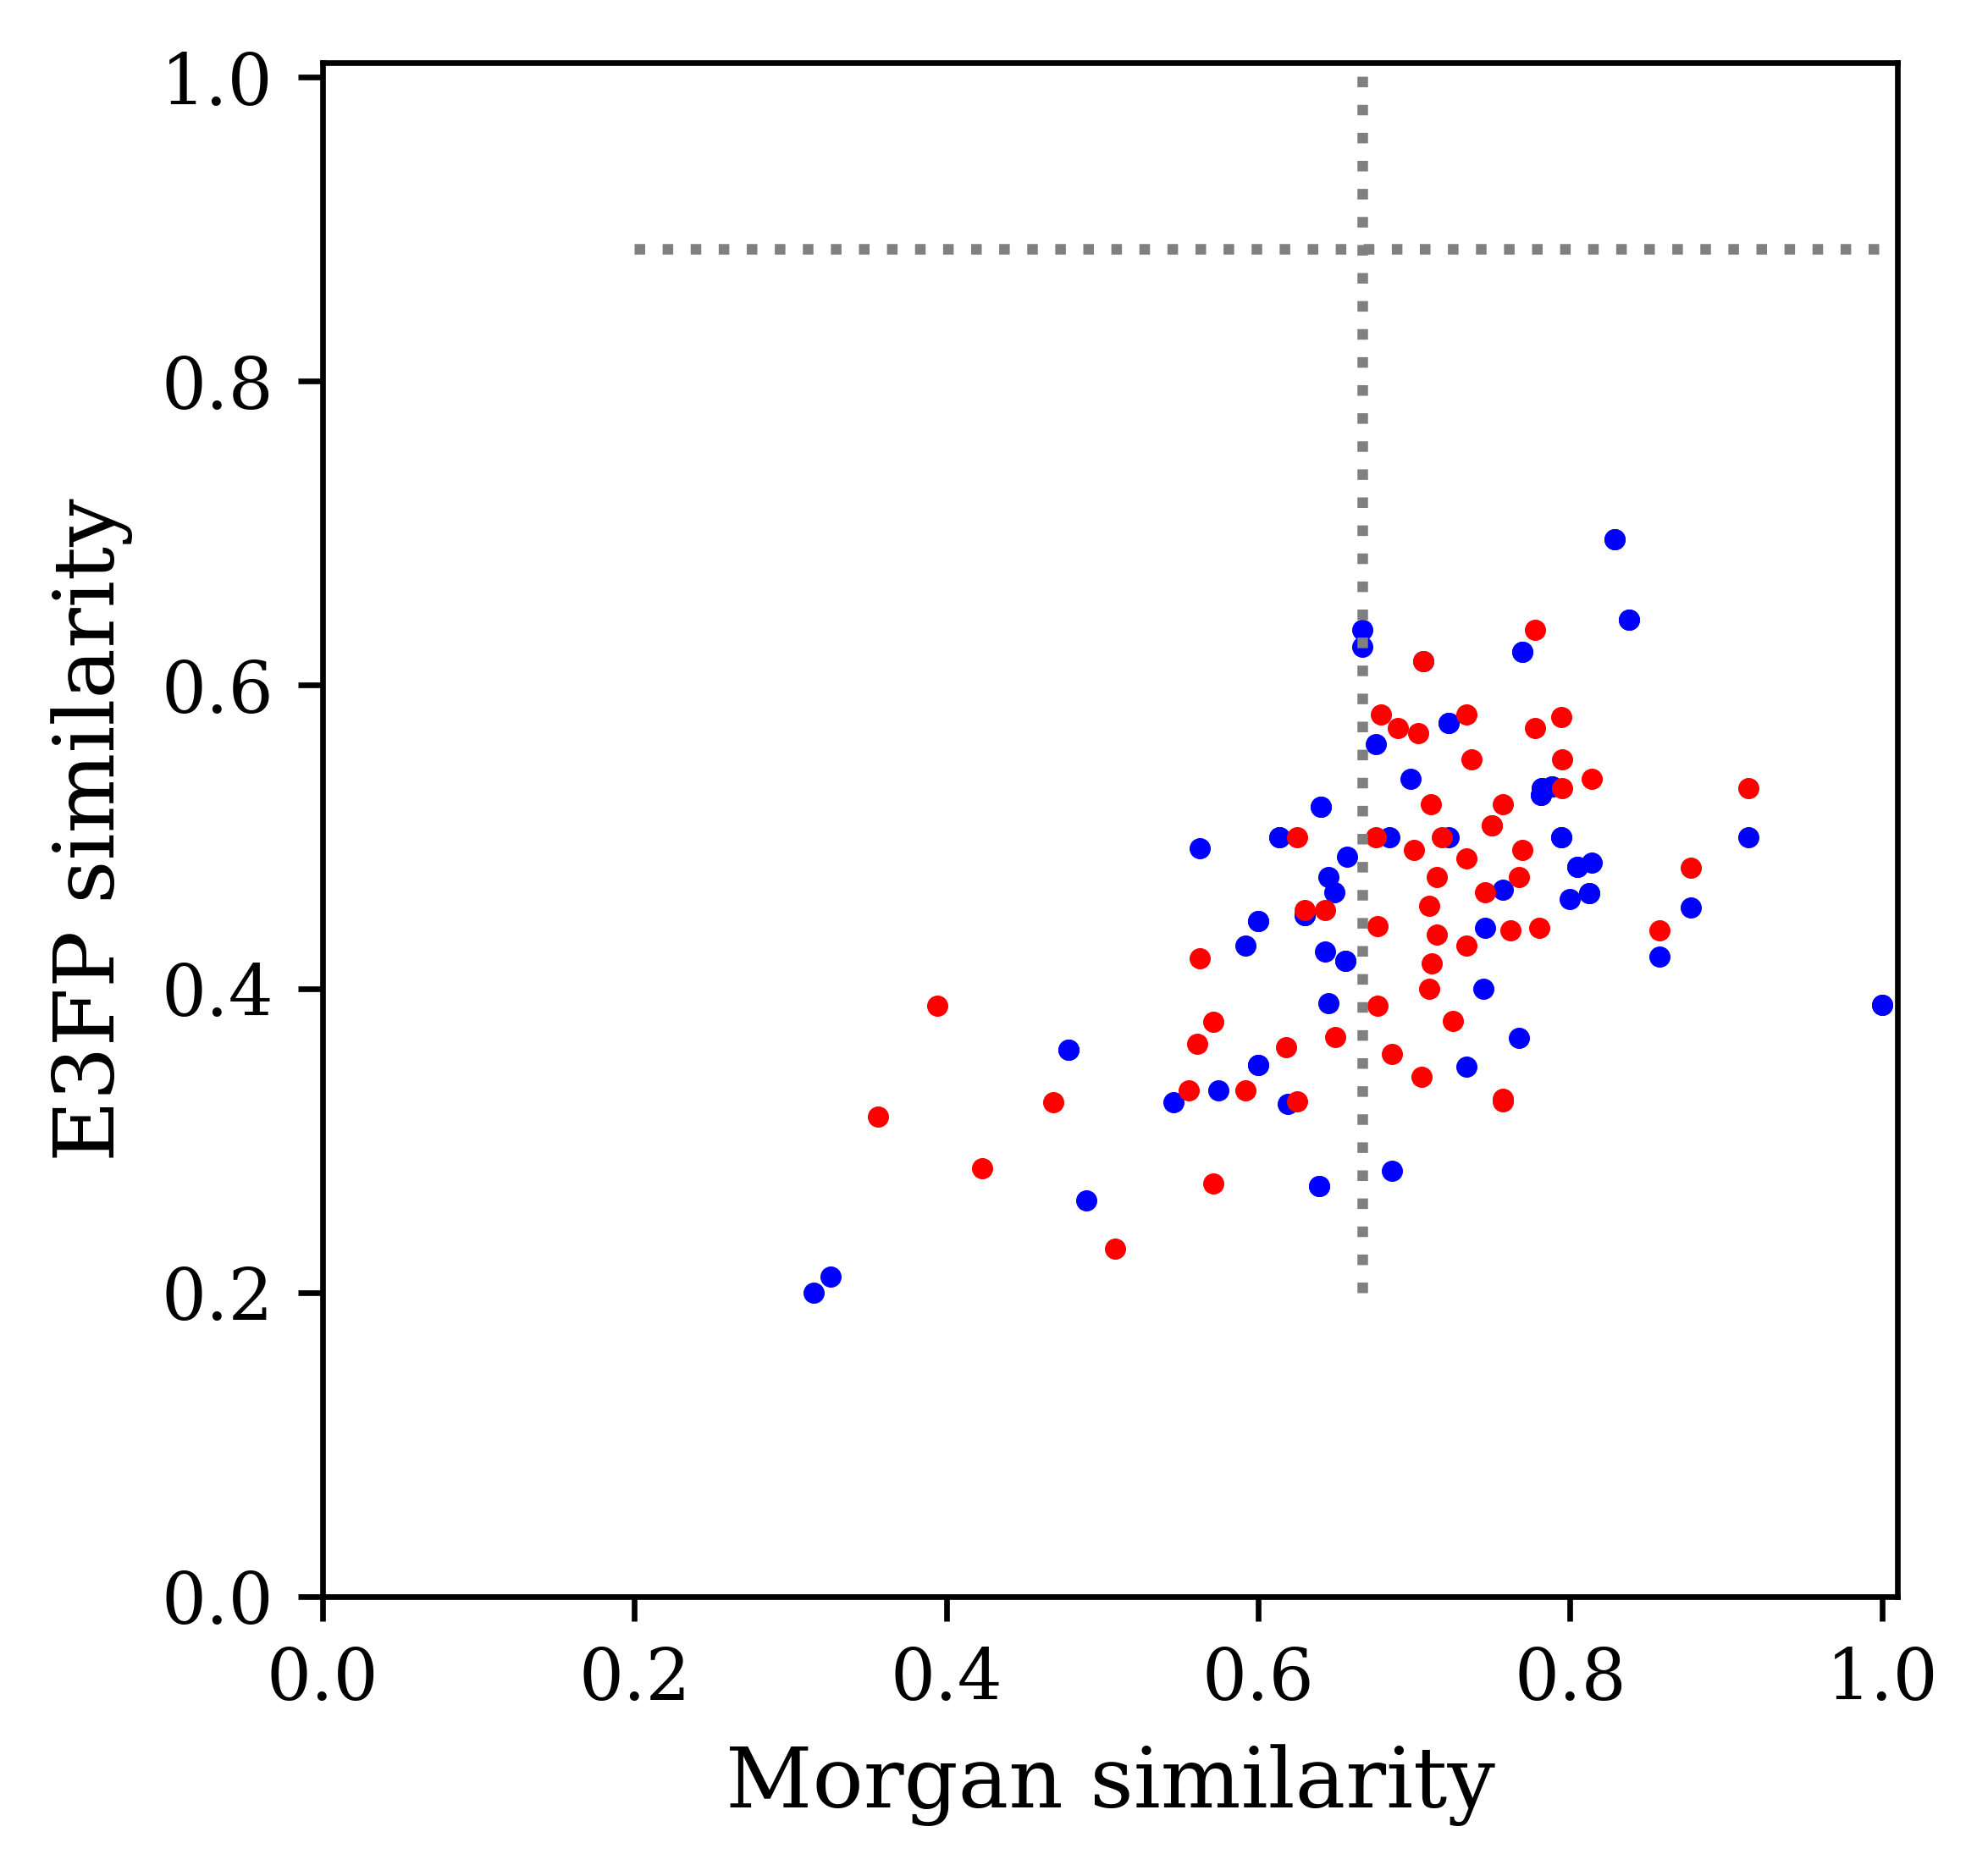

In [6]:
fig = plt.figure(figsize=(4,4),dpi = 600)
plt.rc('font', family='serif', size = 10)
plt.scatter(x1,y1,s=4,color='blue',label="Common hit 1")
plt.scatter(x2,y2,s=4,color='red',label="Different hit 1")
plt.hlines(0.887,0.2, 1.1,linestyles="dotted", colors='grey')
plt.vlines(0.667,0.2, 1.1,linestyles="dotted", colors='grey')
plt.xlim(0.0,1.01)
plt.ylim(0.0,1.01)
plt.xlabel("Morgan similarity", fontsize=12)
plt.ylabel("E3FP similarity", fontsize=12)
#legend = plt.legend(loc='lower left', shadow=False, fontsize=8)
plt.show()
#fig.savefig(path+"MCS and Spearman nearest neighbor correlation.png", dpi = 600,bbox_inches='tight')

### Correspondence between spectral and structural similarity hit results

In [7]:
df_Pearson = pd.read_csv(path+"Drug DFT IR spectra Pearson matrix - low variance Unique compounds.csv", index_col="Unnamed: 0")
df_Spearman = pd.read_csv(path+"Drug DFT IR spectra Spearman matrix - low variance Unique compounds.csv", index_col="Unnamed: 0")
df_total_Pearson = pd.read_csv(path+"Drug DFT total IR spectra Pearson matrix - low variance Unique compounds.csv", index_col="Unnamed: 0")
df_total_Spearman = pd.read_csv(path+"Drug DFT total IR spectra Spearman matrix - low variance Unique compounds.csv", index_col="Unnamed: 0")
df_MACCS = pd.read_csv(path+"Drugs MACCS Tanimoto matrix - Unique compounds.csv", index_col="Unnamed: 0")
df_MCS = pd.read_csv(path+"Drugs MCS Tanimoto matrix - Unique compounds.csv", index_col="Unnamed: 0")
df_Morgan = pd.read_csv(path+"Drugs Morgan Tanimoto matrix - Unique compounds.csv",index_col="Unnamed: 0")
df_E3FP = pd.read_csv(path+"Drugs E3FP Tanimoto matrix - Unique compounds.csv",index_col="Unnamed: 0")
df_label = pd.read_csv(path+"Drugs Canonical Smiles and Fingerprints and optimal K - Unique compounds.csv", index_col='Name')

In [8]:
def tophits(df,compound,topn):
    # sort similarity score in ascending order
    idx = np.argsort(df[compound])
    tophits = df[compound][idx[::-1]][0:topn+1]
    #print(tophits)
    return tophits

In [83]:
print("*****MACCS TOP HITS*****")
tophits(df_MACCS,'THC',10)

*****MACCS TOP HITS*****


D9THC               1.000000
D6THC               1.000000
THC                 1.000000
Synhexyl            0.948718
DMHP                0.948718
Cannabinol          0.894737
Cannabidiol         0.690476
Norbuprenorphine    0.516667
Codeine             0.508772
Buprenorphine       0.500000
Morphine            0.491228
Name: THC, dtype: float64

In [94]:
print("*****MCS TOP HITS*****")
tophits(df_MCS,'THC',60)

*****MCS TOP HITS*****


Cannabinol        1.000000
D6THC             1.000000
D9THC             1.000000
THC               1.000000
Synhexyl          0.958333
                    ...   
4-FA              0.360000
4-HO-DiPT         0.354839
Cannabidiol       0.352941
Ephedrine         0.346154
Etilamfetamine    0.346154
Name: THC, Length: 61, dtype: float64

In [85]:
print("*****Morgan TOP HITS*****")
tophits(df_Morgan,'THC',10)

*****Morgan TOP HITS*****


THC            1.000000
D9THC          1.000000
D6THC          0.649123
Cannabidiol    0.571429
Synhexyl       0.439394
Cannabinol     0.419355
DMHP           0.298701
Hydrocodone    0.170732
6-APDB         0.166667
Fentanyl       0.162162
MDEA           0.161765
Name: THC, dtype: float64

In [86]:
print("*****E3FP TOP HITS*****")
tophits(df_E3FP,'THC',10)

*****E3FP TOP HITS*****


THC               1.000000
D9THC             0.389610
D6THC             0.363636
Cannabidiol       0.268293
Synhexyl          0.244444
DMHP              0.216495
Cannabinol        0.179775
Morphine          0.152941
Ethylphenidate    0.148148
Codeine           0.146067
Oxymorphone       0.136364
Name: THC, dtype: float64

In [36]:
#print("*****Pearson TOP HITS*****")
#tophits(df_Pearson,'MDA',55)

In [35]:
#print("*****Spearman TOP HITS*****")
#tophits(df_Spearman,'MDA',40)

In [133]:
print("*****Pearson TOP HITS*****")
tophits(df_total_Pearson,'THC',10)

*****Pearson TOP HITS*****


THC             1.000000
D9THC           0.983111
D6THC           0.976847
Synhexyl        0.957880
DMHP            0.942224
Cannabinol      0.900805
4-HO-DiPT       0.753211
6-APDB          0.735583
2C-T-19         0.723018
Pyrovalerone    0.712292
5-MeO-MiPT      0.688462
Name: THC, dtype: float64

In [134]:
print("*****Spearman TOP HITS*****")
tophits(df_total_Spearman,'THC',10)

*****Spearman TOP HITS*****


THC                1.000000
D9THC              0.989899
D6THC              0.987999
Synhexyl           0.984095
DMHP               0.980688
Cannabinol         0.927343
Mescaline          0.863261
NBOMe-mescaline    0.850452
MMAI               0.848562
2C-T-7             0.848532
2C-T-19            0.848239
Name: THC, dtype: float64

## Hit accuracy

In [24]:
def get_tophit_accuracy(df,n_hits):
    hit_accuracy = []
    for compound in df.index:
        #print("Compound:", compound)
        #print("Compound class:",df_label.loc[compound,'Class'])
        query_class = df_label.loc[compound,'Class']
        #print("Top",n_hits,"hit(s)")
        hit_list = tophits(df,compound,n_hits)
        for i in range(len(hit_list)):
            hit_class = df_label.loc[hit_list.index[i],'Class']
            #print("Hit class:", df_label.loc[hit_list.index[i],'Class'])
            if query_class == hit_class:
                hit_accuracy.append(int(1))
            else:
                hit_accuracy.append(int(0))
    return hit_accuracy

In [25]:
def accu_ratio(df):
    accu_result = []
    for n_hit in [1,2,3,4,5]:
        hit_result = get_tophit_accuracy(df,n_hit)
        accu_result.append(sum(hit_result)/len(hit_result))
    print(accu_result)
    return accu_result

In [26]:
MACCS_result = accu_ratio(df_MACCS)
MCS_result = accu_ratio(df_MCS)
Morgan_result = accu_ratio(df_Morgan)
E3FP_result = accu_ratio(df_E3FP)

Pearson_result = accu_ratio(df_total_Pearson)
Spearman_result = accu_ratio(df_total_Spearman)

[0.9763779527559056, 0.9658792650918635, 0.9311023622047244, 0.9070866141732283, 0.8805774278215223]
[0.9645669291338582, 0.9553805774278216, 0.937007874015748, 0.9181102362204724, 0.8976377952755905]
[0.9960629921259843, 0.9763779527559056, 0.9429133858267716, 0.9007874015748032, 0.8661417322834646]
[0.968503937007874, 0.9238845144356955, 0.8700787401574803, 0.8267716535433071, 0.7887139107611548]
[0.9212598425196851, 0.8503937007874016, 0.7696850393700787, 0.705511811023622, 0.6653543307086615]
[0.9173228346456693, 0.863517060367454, 0.7913385826771654, 0.7291338582677165, 0.6929133858267716]


In [27]:
labels = ['hit 1','hits 1-2','hits 1-3','hits 1-4','hits 1-5']
X = np.arange(1, 25,5)
width = 0.5

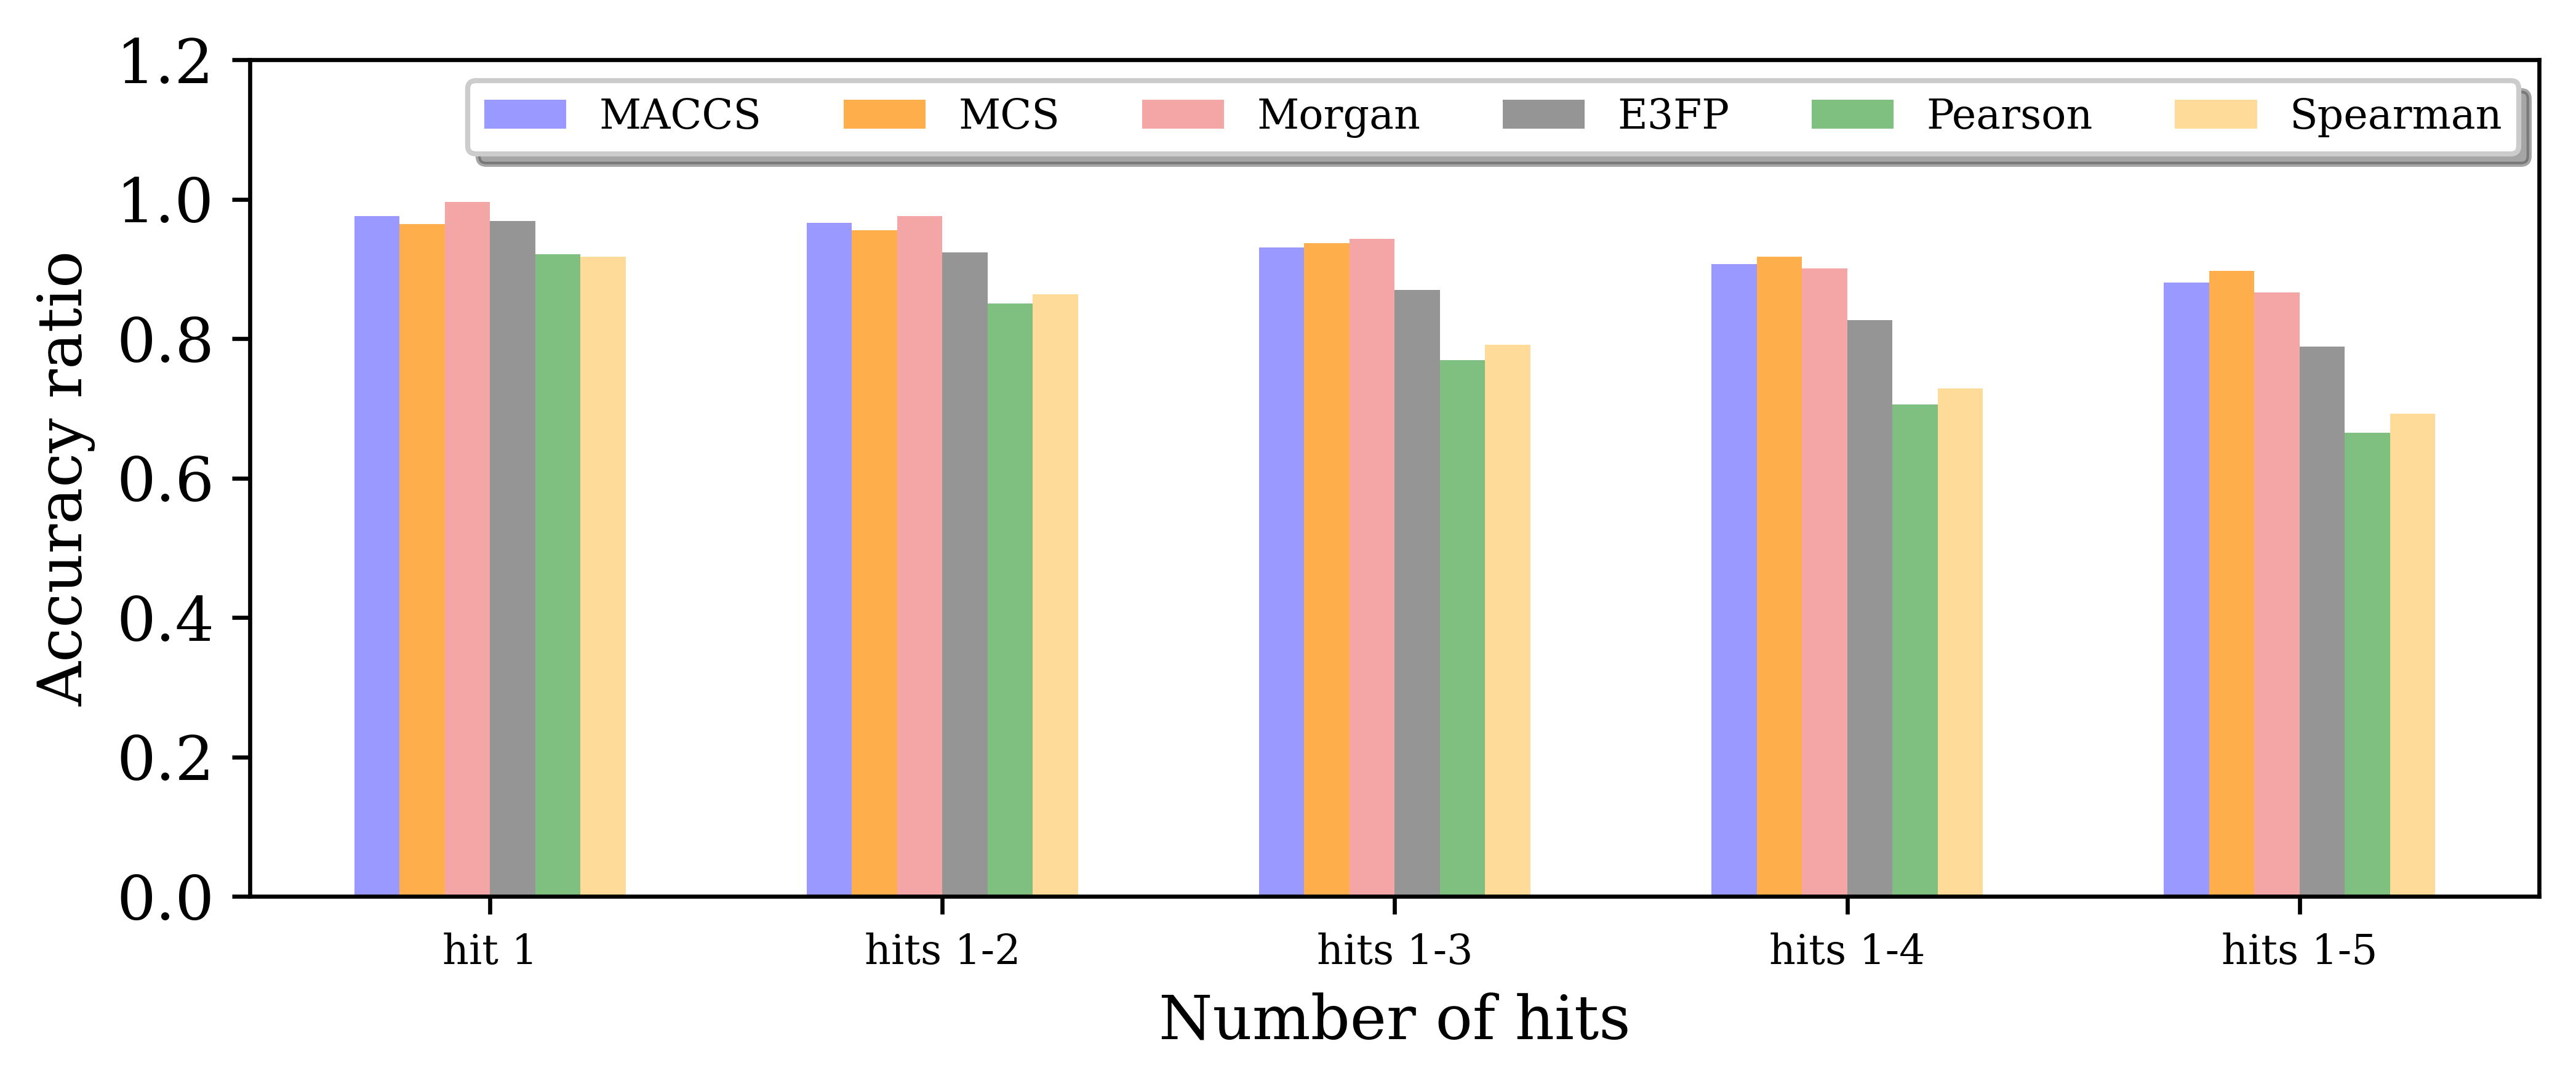

In [34]:
fig, ax = plt.subplots(figsize=(8,3), dpi=600)
plt.rc('font', family='serif', size = 12)
ax.set_xlabel('Number of hits')
ax.set_ylabel('Accuracy ratio')
ax.set_xticks(X)
ax.set_xticklabels(labels, fontsize=8)

ax.set_ylim(0,1.2)
ax1 = ax.bar(X-5*width/2,MACCS_result, label = "MACCS", alpha=0.4,width=width, color="blue")
ax2 = ax.bar(X-3*width/2,MCS_result, label = "MCS", alpha=0.7,width=width, color="darkorange")
ax3 = ax.bar(X-width/2,Morgan_result, label = "Morgan", alpha=0.7,width=width, color="lightcoral")
ax4 = ax.bar(X+width/2,E3FP_result, label = "E3FP", alpha=0.7,width=width, color="dimgrey")
ax5 = ax.bar(X+3*width/2,Pearson_result, label = "Pearson", alpha=0.5,width=width, color="green")
ax6 = ax.bar(X+5*width/2,Spearman_result, label = "Spearman", alpha=0.4,width=width, color="orange")

plt.legend()
legend = plt.legend(loc='upper right', shadow=True, fontsize=8, ncol=6)
plt.show()
fig.savefig(path+"Figure 4. Accuracy ratio of retrieving compound(s) of the same class.png", bbox_inches='tight')